In [1]:
from qiskit import *
from qiskit_ibm_provider import IBMProvider

In [2]:
provider = IBMProvider()

In [3]:
backend = provider.get_backend('ibmq_qasm_simulator')

In [4]:
def deus_func(case: int):
    f = QuantumCircuit(2)
    if case in [2,3]:
        f.cx(0,1)
    if case in [3,4]:
        f.x(1)
    return f

In [5]:
func = deus_func(3)

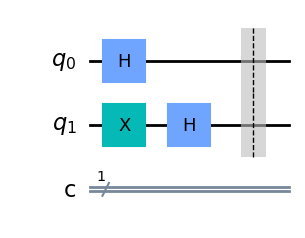

In [6]:
#  Creating and compiling the circuits to use the given circ
n = func.num_qubits - 1
qc = QuantumCircuit(n+1, n)

qc.x(n)  # Applying NOT gate to put last qubit into |1> format
qc.h(range(n+1))  # Applying hadamard gate to every qubit
qc.barrier()  # For logical separating
# Showing current state
# Last Qubit (1 in my instance) is in |1> format, everything else is |0>
qc.draw('mpl')

In [8]:
qc.compose(func,inplace=True)  # Adds the other circuit to this one
# Effectively adds them together
qc.barrier()

In [9]:
qc.h(range(n))  # Un-doing the Hadamard gate applied to everything before
qc.measure(range(n), range(n))

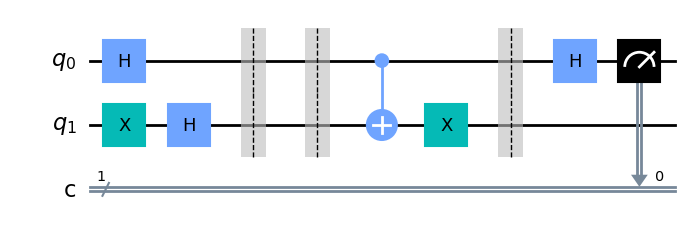

In [10]:
qc.draw('mpl')

In [16]:
job = backend.run(qc,shots = 1000, memory = True)

In [17]:
result = job.result()
counts = result.get_counts()

In [18]:
counts

{'1': 1000}

In [19]:
memory = result.get_memory()

In [21]:
memory[0]

'1'

In [25]:
if memory[0] == '0':
    print('Constant')
else:
    print('Balanced')

Balanced


## BV-Algo